<a href="https://colab.research.google.com/github/khatana706/DATA-SCIENCE/blob/main/survival_analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Survival Analysis with Python Tutorial — How, What, When, and Why

https://towardsai.net/survival-analysis-with-python

In [ ]:
!pip install lifelines

     |████████████████████████████████| 348kB 4.9MB/s 


In [ ]:
!wget https://raw.githubusercontent.com/towardsai/tutorials/master/survival_analysis_in_python/lung.csv

--2020-09-11 21:11:00--  https://raw.githubusercontent.com/towardsai/tutorials/master/survival_analysis_in_python/lung.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7856 (7.7K) [text/plain]
Saving to: ‘lung.csv’

lung.csv            100%[===================>]   7.67K  --.-KB/s    in 0s      

2020-09-11 21:11:01 (82.9 MB/s) - ‘lung.csv’ saved [7856/7856]



##2. Kaplan-Meier-Estimator



In [ ]:
#Import required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

#Read the dataset:

data = pd.read_csv("lung.csv")
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [ ]:
#Print the column names of our data:

print(data.columns)

Index(['Unnamed: 0', 'inst', 'time', 'status', 'age', 'sex', 'ph.ecog',
       'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')


In [ ]:
#Additional info about our dataset:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


In [ ]:
#Statistical info about our dataset:

data.describe()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.00000,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,114.50000,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,65.96211,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.00000,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,57.75000,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,114.50000,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,171.25000,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,228.00000,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


AxesSubplot(0.125,0.125;0.775x0.755)


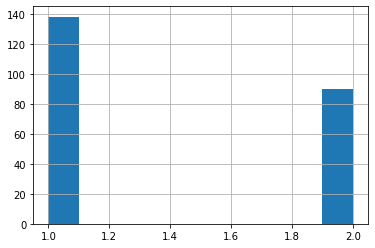

In [ ]:
#Plot histogram for sex of patient:

print (data["sex"].hist())

In [ ]:
#Create an object of KaplanMeierFitter:

kmf = KaplanMeierFitter() 

#Organize our data:

#If status = 1 , then dead = 0
#If status = 2 , then dead = 1

data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1

data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [ ]:
#Fit the parameter values in our object:

kmf.fit(durations =  data["time"], event_observed = data["dead"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [ ]:
#Print the event table:

kmf.event_table

# Removed = Observed + Censored
# Censored = Person that didn't die.(They are of no use to us!)
# Observed = Persons that died.

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [ ]:
#Calculating the survival probability for a given time:

event_at_0 = kmf.event_table.iloc[0,:]

#Calculate the survival probability for t=0:

surv_for_0 = (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk
surv_for_0

1.0

In [ ]:
#Calculating the survival probability for a given time:

event_at_5 = kmf.event_table.iloc[1,:]

#Calculate the survival probability for t=5:
surv_for_5 = (event_at_5.at_risk - event_at_5.observed)/event_at_5.at_risk
surv_for_5

0.9956140350877193

In [ ]:
#Calculating the survival probability for a given time:

event_at_11 = kmf.event_table.iloc[2,:]

#Calculate the survival probability for t=11:
surv_for_11 = (event_at_11.at_risk - event_at_11.observed)/event_at_11.at_risk
surv_for_11

0.986784140969163

In [ ]:
#Calculating the actual survival probability at a given time:

surv_after_0 = surv_for_0 
print("Survival Probability After 0 Days: ",surv_after_0)

Survival Probability After 0 Days:  1.0


In [ ]:
#Calculating the actual survival probability at a given time:

surv_after_5 = surv_for_0 * surv_for_5
print("Survival Probability After 5 Days: ",surv_after_5)

Survival Probability After 5 Days:  0.9956140350877193


In [ ]:
#Calculating the actual survival probability at a given time:

surv_after_11 = surv_for_0 * surv_for_5 * surv_for_11
print("Survival Probability After 11 Days: ",surv_after_11)

Survival Probability After 11 Days:  0.9824561403508771


In [ ]:
#Get the probability values the easy way!

print("Survival probability for t=0: ",kmf.predict(0))
print("Survival probability for t=5: ",kmf.predict(5))
print("Survival probability for t=11: ",kmf.predict(11))

Survival probability for t=0:  1.0
Survival probability for t=5:  0.9956140350877193
Survival probability for t=11:  0.9824561403508766


In [ ]:
#Predicting the surviaval probability for an array of value:

kmf.predict([0,5,11,12])

0     1.000000
5     0.995614
11    0.982456
12    0.978070
Name: KM_estimate, dtype: float64

In [ ]:
#To get the full list:

kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
5.0,0.995614
11.0,0.982456
12.0,0.978070
13.0,0.969298
...,...
840.0,0.067127
883.0,0.050346
965.0,0.050346


Text(0, 0.5, 'Probability of survival')

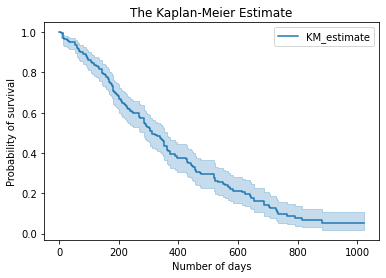

In [ ]:
#Plot the graph:

kmf.plot()
plt.title("The Kaplan-Meier Estimate")
plt.xlabel("Number of days")
plt.ylabel("Probability of survival")

In [ ]:
#The median number of days:

print("The median survival time: ",kmf.median_survival_time_)

The median survival time:  310.0


In [ ]:
#Survival probability with confidence interval:

kmf.confidence_interval_survival_function_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
5.0,0.969277,0.999381
11.0,0.953935,0.993379
12.0,0.948120,0.990813
13.0,0.936682,0.985244
...,...,...
840.0,0.030728,0.123060
883.0,0.017866,0.108662
965.0,0.017866,0.108662
1010.0,0.017866,0.108662


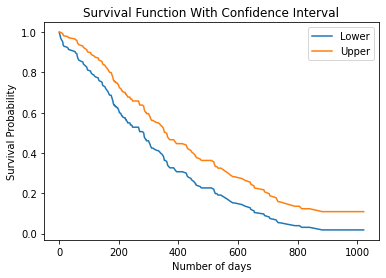

In [ ]:
#Plot survival function with confidence interval:

confidence_surv_func = kmf.confidence_interval_survival_function_

plt.plot(confidence_surv_func["KM_estimate_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["KM_estimate_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

In [ ]:
#Probabaility of a subject dying:
#p(1022) = p(0) +......+p(1022)

kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017544
12.0,0.021930
13.0,0.030702
...,...
840.0,0.932873
883.0,0.949654
965.0,0.949654


Text(0, 0.5, "Probability of person's death")

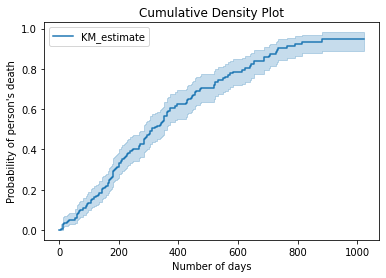

In [ ]:
#Plot the cumulative density graph:

kmf.plot_cumulative_density()
plt.title("Cumulative Density Plot")
plt.xlabel("Number of days")
plt.ylabel("Probability of person's death")

In [ ]:
#Cumulative density with confidence interval:

kmf.confidence_interval_cumulative_density_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,0.000000,0.000000
5.0,0.030723,0.000619
11.0,0.046065,0.006621
12.0,0.051880,0.009187
13.0,0.063318,0.014756
...,...,...
840.0,0.969272,0.876940
883.0,0.982134,0.891338
965.0,0.982134,0.891338
1010.0,0.982134,0.891338


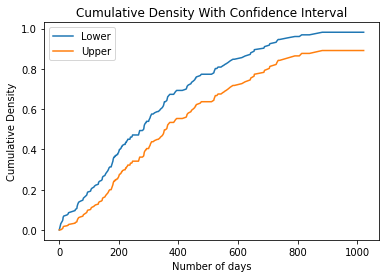

In [ ]:
#Plot cumulative density with confidence interval:

confidence_cumulative_density = kmf.confidence_interval_cumulative_density_

plt.plot(kmf.confidence_interval_cumulative_density_["KM_estimate_lower_0.95"],label="Lower")
plt.plot(kmf.confidence_interval_cumulative_density_["KM_estimate_upper_0.95"],label="Upper")
plt.title("Cumulative Density With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Cumulative Density")
plt.legend()

In [ ]:
#Find cumulative density at a specific time:

kmf.cumulative_density_at_times(times=1022)

1022    0.949654
Name: KM_estimate, dtype: float64

In [ ]:
#Conditional median time to event of interest:

kmf.conditional_time_to_event_

,KM_estimate - Conditional median duration remaining to event
timeline,
0.0,310.0
5.0,305.0
11.0,309.0
12.0,308.0
13.0,316.0
...,...
840.0,inf
883.0,inf
965.0,inf


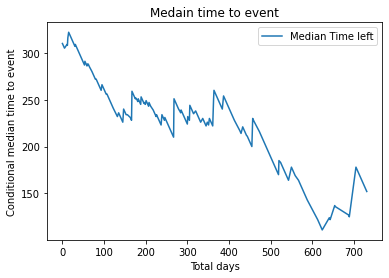

In [ ]:
#Conditional median time left for event:

median_time_to_event = kmf.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

##3. Nelson-Aalen-Estimator

In [ ]:
#Hazard function:

from lifelines import NelsonAalenFitter

#Create an object of NelsonAalenFitter:

naf = NelsonAalenFitter()

#Fit our data into the object:

naf.fit(data["time"], event_observed=data["dead"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 228 total observations, 63 right-censored observations>

In [ ]:
#Print the cumulative hazard:

naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017660
12.0,0.022125
13.0,0.031114
...,...
840.0,2.641565
883.0,2.891565
965.0,2.891565


Text(0, 0.5, "Cumulative Probability of person's death")

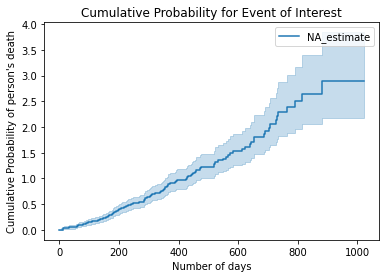

In [ ]:
#Plot the cumulative hazard grpah:

naf.plot_cumulative_hazard()
plt.title("Cumulative Probability for Event of Interest")
plt.xlabel("Number of days")
plt.ylabel("Cumulative Probability of person's death")

In [ ]:
#We can predict the value at a certain point :

print("Time = 500 days: ",naf.predict(500))
print("Time = 1022 days: ",naf.predict(1022))

Time = 500 days:  1.219546171331098
Time = 1022 days:  2.8915648373471052


In [ ]:
#Cumulative hazard with confidence interval:

naf.confidence_interval_

,NA_estimate_lower_0.95,NA_estimate_upper_0.95
0.0,0.000000,0.000000
5.0,0.000618,0.031136
11.0,0.006628,0.047055
12.0,0.009209,0.053156
13.0,0.014832,0.065266
...,...,...
840.0,2.058738,3.389389
883.0,2.176987,3.840697
965.0,2.176987,3.840697
1010.0,2.176987,3.840697


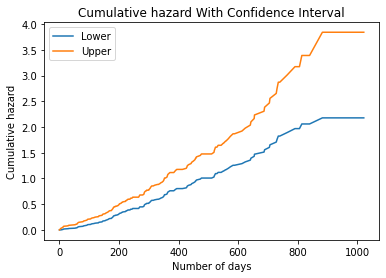

In [ ]:
#Plot cumulative hazard with confidence interval:

confidence_interval = naf.confidence_interval_

plt.plot(confidence_interval["NA_estimate_lower_0.95"],label="Lower")
plt.plot(confidence_interval["NA_estimate_upper_0.95"],label="Upper")
plt.title("Cumulative hazard With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Cumulative hazard")
plt.legend()

Text(0.5, 0, 'Number of Days')

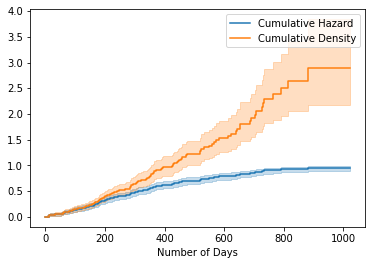

In [ ]:
#Plot the cumulative_hazard and cumulative density:

kmf.plot_cumulative_density(label="Cumulative Hazard")
naf.plot_cumulative_hazard(label="Cumulative Density")
plt.xlabel("Number of Days")

##4. Kaplan-Meier fitter Based on Different Groups

In [ ]:
#Import required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

#Read the dataset:

data = pd.read_csv("lung.csv")
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [ ]:
#Organize our data:

#If status = 1 , then dead = 0
#If status = 2 , then dead = 1

data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1

data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [ ]:
#Create two objects for groups:

#kmf_m for male data:
#kmf_f for female data:

kmf_m = KaplanMeierFitter() 
kmf_f = KaplanMeierFitter() 

In [ ]:
#Dividing data into groups:

Male = data.query("sex == 1")
Female = data.query("sex == 2")

#View data of Male group:

Male.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [ ]:
#View data of Female group:

Female.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
6,7,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0,1.0
7,8,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0,1.0
11,12,16.0,654,2,68,2,2.0,70.0,70.0,NaN,23.0,1.0
12,13,11.0,728,2,68,2,1.0,90.0,90.0,NaN,5.0,1.0
18,19,1.0,61,2,56,2,2.0,60.0,60.0,238.0,10.0,1.0


In [ ]:
#Fit data into objects:

kmf_m.fit(durations =  Male["time"],event_observed = Male["dead"] ,label="Male")
kmf_f.fit(durations =  Female["time"],event_observed = Female["dead"], label="Female")

<lifelines.KaplanMeierFitter:"Female", fitted with 90 total observations, 37 right-censored observations>

In [ ]:
#Event table for male group:

kmf_m.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,138,138
11.0,3,3,0,0,138
12.0,1,1,0,0,135
13.0,2,2,0,0,134
15.0,1,1,0,0,132
...,...,...,...,...,...
814.0,1,1,0,0,5
840.0,1,0,1,0,4
883.0,1,1,0,0,3


In [ ]:
#Event table for female group:

kmf_f.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,90,90
5.0,1,1,0,0,90
60.0,1,1,0,0,89
61.0,1,1,0,0,88
62.0,1,1,0,0,87
...,...,...,...,...,...
735.0,1,1,0,0,5
740.0,1,0,1,0,4
765.0,1,1,0,0,3


In [ ]:
#Predict value based on time:

kmf_m.predict(11)

0.9782608695652172

In [ ]:
#Predict value based on time:

kmf_f.predict(11)

0.9888888888888887

In [ ]:
#Get complete data of survival function for male group:

kmf_m.survival_function_

,Male
timeline,
0.0,1.000000
11.0,0.978261
12.0,0.971014
13.0,0.956522
15.0,0.949275
...,...
814.0,0.053571
840.0,0.053571
883.0,0.035714


In [ ]:
#Get complete data of survival function for female group:

kmf_f.survival_function_

,Female
timeline,
0.0,1.000000
5.0,0.988889
60.0,0.977778
61.0,0.966667
62.0,0.955556
...,...
735.0,0.124822
740.0,0.124822
765.0,0.083214


Text(0.5, 1.0, 'KMF')

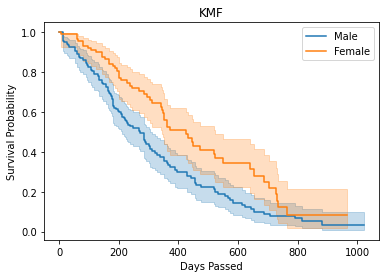

In [ ]:
#Plot the survival_function data:

kmf_m.plot()
kmf_f.plot()

plt.xlabel("Days Passed")
plt.ylabel("Survival Probability")
plt.title("KMF")

In [ ]:
#Cumulative density for male group:

kmf_m.cumulative_density_

,Male
timeline,
0.0,0.000000
11.0,0.021739
12.0,0.028986
13.0,0.043478
15.0,0.050725
...,...
814.0,0.946429
840.0,0.946429
883.0,0.964286


In [ ]:
#Cumulative density for female group:

kmf_f.cumulative_density_

,Female
timeline,
0.0,0.000000
5.0,0.011111
60.0,0.022222
61.0,0.033333
62.0,0.044444
...,...
735.0,0.875178
740.0,0.875178
765.0,0.916786


Text(0, 0.5, 'Probability')

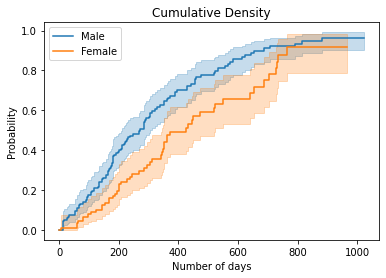

In [ ]:
#PLot the graph for cumulative density for both groups:

kmf_m.plot_cumulative_density()
kmf_f.plot_cumulative_density()
plt.title("Cumulative Density")
plt.xlabel("Number of days")
plt.ylabel("Probability")

In [ ]:
#Hazard Function:

from lifelines import NelsonAalenFitter

In [ ]:
#Fitting the data into objects:

naf_m = NelsonAalenFitter()
naf_f = NelsonAalenFitter()

naf_m.fit(Male["time"],event_observed = Male["dead"])
naf_f.fit(Female["time"],event_observed = Female["dead"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 90 total observations, 37 right-censored observations>

In [ ]:
#Cumulative hazard for male group:

naf_m.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
11.0,0.021899
12.0,0.029306
13.0,0.044287
15.0,0.051863
...,...
814.0,2.831337
840.0,2.831337
883.0,3.164670


In [ ]:
#Cumulative hazard for female group:

naf_f.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.011111
60.0,0.022347
61.0,0.033711
62.0,0.045205
...,...
735.0,1.988977
740.0,1.988977
765.0,2.322310


Text(0, 0.5, 'Cumulative Hazard')

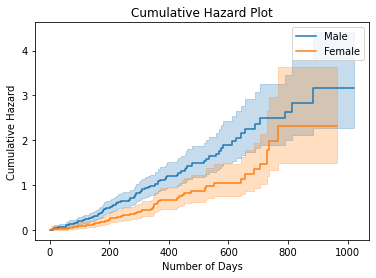

In [ ]:
#Plot the graph for cumulative hazard:

naf_m.plot_cumulative_hazard(label="Male")
naf_f.plot_cumulative_hazard(label="Female")
plt.title("Cumulative Hazard Plot")
plt.xlabel("Number of Days")
plt.ylabel("Cumulative Hazard")

In [ ]:
#Conditional median time to event of interest:

kmf_m.conditional_time_to_event_

,Male - Conditional median duration remaining to event
timeline,
0.0,270.0
11.0,272.0
12.0,271.0
13.0,271.0
15.0,270.0
...,...
814.0,inf
840.0,inf
883.0,inf


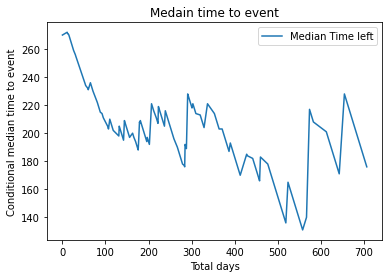

In [ ]:
#Conditional median time left for event for male group:

median_time_to_event = kmf_m.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

In [ ]:
#Conditional median time to event of interest for female group:

kmf_f.conditional_time_to_event_

,Female - Conditional median duration remaining to event
timeline,
0.0,426.0
5.0,421.0
60.0,373.0
61.0,372.0
62.0,371.0
...,...
735.0,inf
740.0,inf
765.0,inf


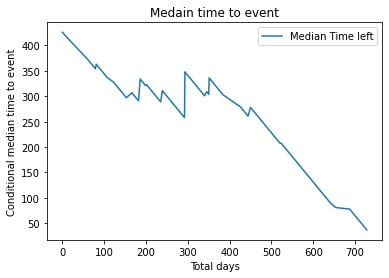

In [ ]:
#Conditional median time left for event for female group:

median_time_to_event = kmf_f.conditional_time_to_event_
plt.plot(median_time_to_event,label="Median Time left")
plt.title("Medain time to event")
plt.xlabel("Total days")
plt.ylabel("Conditional median time to event")
plt.legend()

In [ ]:
#Survival probability with confidence interval for male group:

kmf_m.confidence_interval_survival_function_

,Male_lower_0.95,Male_upper_0.95
0.0,1.000000,1.000000
11.0,0.934122,0.992937
12.0,0.924619,0.989022
13.0,0.905787,0.980229
15.0,0.896549,0.975490
...,...,...
814.0,0.019335,0.114081
840.0,0.019335,0.114081
883.0,0.008603,0.096828
1010.0,0.008603,0.096828


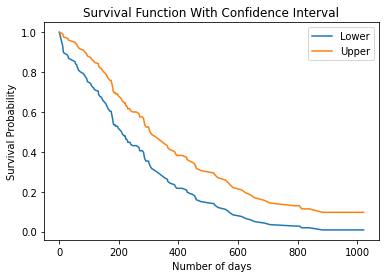

In [ ]:
#Plot survival function with confidence interval for male group:

confidence_surv_func = kmf_m.confidence_interval_survival_function_

plt.plot(confidence_surv_func["Male_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["Male_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

In [ ]:
#Survival probability with confidence interval for female group:

kmf_f.confidence_interval_survival_function_

,Female_lower_0.95,Female_upper_0.95
0.0,1.000000,1.000000
5.0,0.923743,0.998427
60.0,0.914060,0.994396
61.0,0.900217,0.989126
62.0,0.885909,0.983083
...,...,...
735.0,0.042931,0.252736
740.0,0.042931,0.252736
765.0,0.018505,0.212364
821.0,0.018505,0.212364


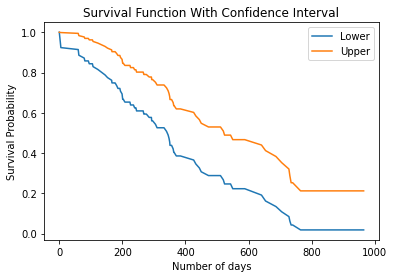

In [ ]:
#Plot survival function with confidence interval for female group:

confidence_surv_func = kmf_f.confidence_interval_survival_function_

plt.plot(confidence_surv_func["Female_lower_0.95"],label="Lower")
plt.plot(confidence_surv_func["Female_upper_0.95"],label="Upper")
plt.title("Survival Function With Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend()

Text(0.5, 0, 'Number of Days')

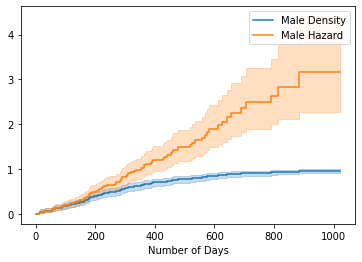

In [ ]:
#Plot the cumulative_hazard and cumulative density:

kmf_m.plot_cumulative_density(label="Male Density")
naf_m.plot_cumulative_hazard(label="Male Hazard")
plt.xlabel("Number of Days")

Text(0.5, 0, 'Number of Days')

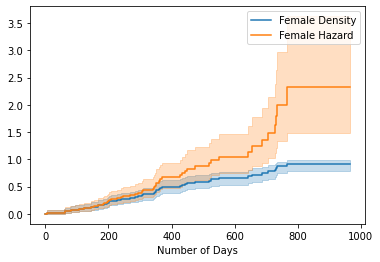

In [ ]:
#Plot the cumulative_hazard and cumulative density:

kmf_f.plot_cumulative_density(label="Female Density")
naf_f.plot_cumulative_hazard(label="Female Hazard")
plt.xlabel("Number of Days")

##5. Log-rank Test

In [ ]:
#Define variables for log-rank test:

Time_A = Male['time']
Event_A = Male['dead']

Time_B = Female['time']
Event_B = Female['dead']

In [ ]:
#Performing the Log-Rank test:

from lifelines.statistics import logrank_test

results = logrank_test(Time_A, Time_B, event_observed_A=Event_A, event_observed_B=Event_B)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

In [ ]:
#Print the P-value:

print("P-value :",results.p_value)

P-value : 0.001311164520355457


##6. Cox-regression

In [ ]:
#Import required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [ ]:
#Read the data file:

data = pd.read_csv("lung.csv")
data =  data.drop(["Unnamed: 0"],axis=1)
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [ ]:
#Columns of dataset:

data.columns

Index(['inst', 'time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno',
       'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

In [ ]:
#Drop rows with null values:

data= data.dropna(subset=['inst', 'time', 'status', 'age', 'sex', 
                          'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'])
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0


In [ ]:
#Create an object:

kmf = KaplanMeierFitter() 

In [ ]:
#Organize the data:

data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0,1.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0,1.0


In [ ]:
#Fit data into our object:

kmf.fit(durations =  data["time"], event_observed = data["dead"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 167 total observations, 47 right-censored observations>

In [ ]:
#Get the event table:

kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,167,167
5.0,1,1,0,0,167
11.0,1,1,0,0,166
12.0,1,1,0,0,165
13.0,1,1,0,0,164
...,...,...,...,...,...
814.0,1,1,0,0,5
821.0,1,0,1,0,4
840.0,1,0,1,0,3


In [ ]:
#Get required columns from the data:

data = data[[ 'time', 'age', 'sex', 'ph.ecog','ph.karno',
             'pat.karno', 'meal.cal', 'wt.loss', 'dead']]

In [ ]:
#Get the summary using CoxPHFitter:

cph = CoxPHFitter()
cph.fit(data,"time",event_col="dead")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2020-09-11 21:29:24 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

              z      p   -log2(p)
covariate                        
age        0.93   0.35       1.51
sex       -2.75   0.01       7.37
ph.ecog    3.29 <0.005       9.95
ph.karno   2.00   0.05       4.45
pat.karno -1.49   0.14       2.87
meal.cal   0.11   0.91       0.13
wt.loss   -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

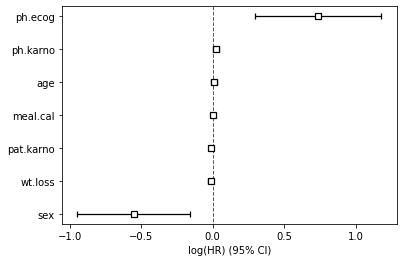

In [ ]:
#Plot the result on graph:

cph.plot()

In [ ]:
data.iloc[10:15,:]

,time,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
17,707,63,1,2.0,50.0,70.0,1025.0,22.0,1.0
18,61,56,2,2.0,60.0,60.0,238.0,10.0,1.0
20,301,67,1,1.0,80.0,80.0,1025.0,17.0,1.0
21,81,49,2,0.0,100.0,70.0,1175.0,-8.0,1.0
23,371,58,1,0.0,90.0,100.0,975.0,13.0,1.0


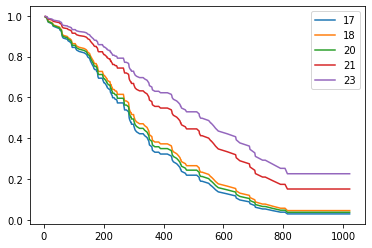

In [ ]:
#Plotting the data:

d_data = data.iloc[10:15,:]
cph.predict_survival_function(d_data).plot()